Author: DIVYAM
.
First Year Student at IIT Guwahati, CSE Department

IMPORTS AND ENVIRONMENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


DATA LOADING

In [2]:

train = pd.read_csv('advertising_sales_data.csv')

DATA PREPROCESSING AND CLEANING

In [3]:

# Handling missing values in 'Radio' column

train['Radio'] = train['Radio'].fillna(train['Radio'].median())

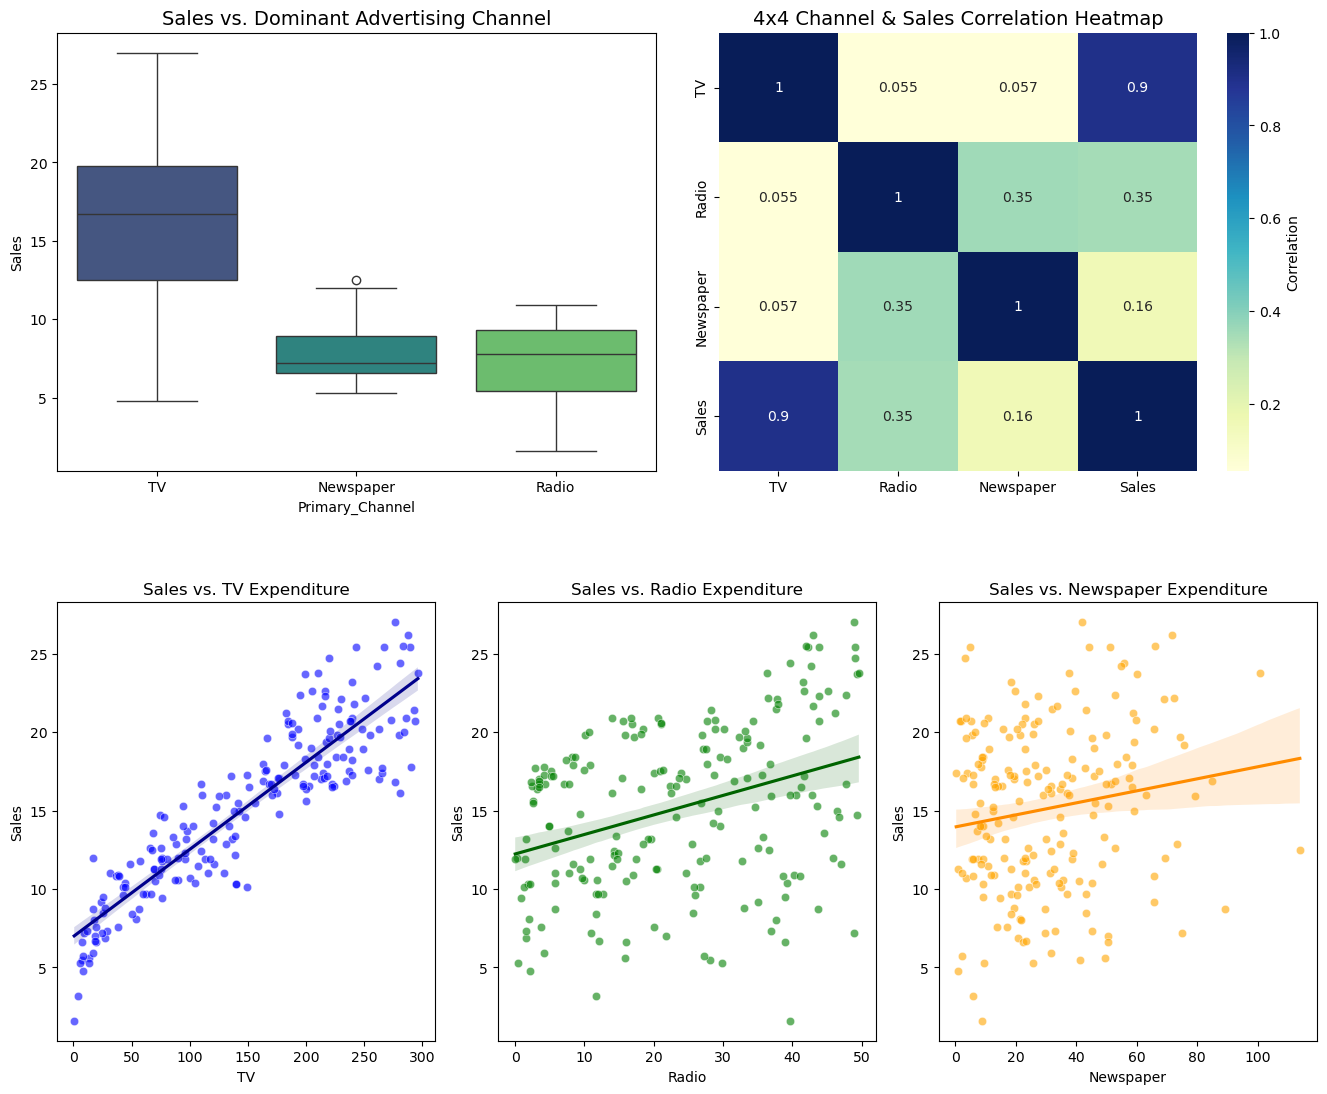

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Clean Data
train = pd.read_csv('advertising_sales_data.csv')
train['Radio'] = train['Radio'].fillna(train['Radio'].mean())

# Identify the 'Primary Channel'
train['Primary_Channel'] = train[['TV', 'Radio', 'Newspaper']].idxmax(axis=1)

# Initialize the figure with a specific size
fig = plt.figure(figsize=(15, 12))

# PLOT 1: Box plot
ax1 = plt.subplot2grid((2, 6), (0, 0), colspan=3)
sns.boxplot(x='Primary_Channel', y='Sales', data=train, hue='Primary_Channel', palette='viridis', legend=False, ax=ax1)
ax1.set_title('Sales vs. Dominant Advertising Channel', fontsize=14)

# PLOT 2: 4x4 Heatmap
ax2 = plt.subplot2grid((2, 6), (0, 3), colspan=3)
corr_4x4 = train[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(corr_4x4, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Correlation'}, ax=ax2)
ax2.set_title('4x4 Channel & Sales Correlation Heatmap', fontsize=14)

# PLOT 3: Sales vs TV 
ax3 = plt.subplot2grid((2, 6), (1, 0), colspan=2)
sns.scatterplot(x='TV', y='Sales', data=train, color='blue', alpha=0.6, ax=ax3)
sns.regplot(x='TV', y='Sales', data=train, scatter=False, color='darkblue', ax=ax3)
ax3.set_title('Sales vs. TV Expenditure')

# PLOT 4: Sales vs Radio 
ax4 = plt.subplot2grid((2, 6), (1, 2), colspan=2)
sns.scatterplot(x='Radio', y='Sales', data=train, color='green', alpha=0.6, ax=ax4)
sns.regplot(x='Radio', y='Sales', data=train, scatter=False, color='darkgreen', ax=ax4)
ax4.set_title('Sales vs. Radio Expenditure')

# PLOT 5: Sales vs Newspaper
ax5 = plt.subplot2grid((2, 6), (1, 4), colspan=2)
sns.scatterplot(x='Newspaper', y='Sales', data=train, color='orange', alpha=0.6, ax=ax5)
sns.regplot(x='Newspaper', y='Sales', data=train, scatter=False, color='darkorange', ax=ax5)
ax5.set_title('Sales vs. Newspaper Expenditure')

plt.subplots_adjust(hspace=0.3, wspace=0.4, top=0.92, bottom=0.08, left=0.08, right=0.92)
plt.show()

Q1: Average TV Advertising Spend: $147.04

Q2: Correlation (Radio vs Sales): 0.3497

Q3: Correlations with Sales:
TV           0.901208
Radio        0.349651
Newspaper    0.157960
Name: Sales, dtype: float64
    Highest Impact Medium: TV

Q4: Full Model Performance:
    Mean Squared Error (MSE): 2.7056
    R-squared (R2): 0.9026


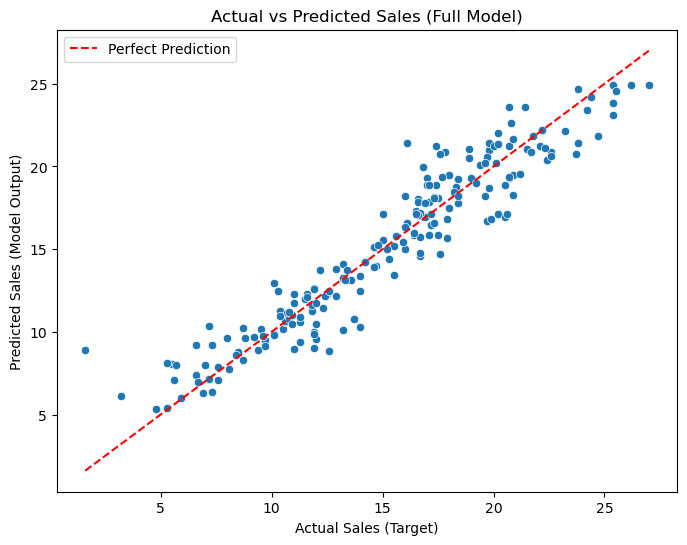


Q5: Predicted Sales for [TV:200, Radio:40, News:50]: 19.81

Q6: Normalized Model Performance:
    MSE: 2.7056
    R2: 0.9026
    (Note: Metrics remain the same because Linear Regression is scale-invariant.)

Q7: Model Performance (Radio & Newspaper ONLY):
    MSE: 24.3467
    R2: 0.1236


In [5]:

# Q1: Average amount spent on TV advertising
avg_tv = train['TV'].mean()
print(f"Q1: Average TV Advertising Spend: ${avg_tv:.2f}")

# Q2: Correlation between radio advertising and sales
corr_radio_sales = train['Radio'].corr(train['Sales'])
print(f"\nQ2: Correlation (Radio vs Sales): {corr_radio_sales:.4f}")

# Q3: Which advertising medium has the highest impact on sales?
# We calculate correlations for all mediums using the 'train' dataframe
correlations = train[['TV', 'Radio', 'Newspaper', 'Sales']].corr()['Sales'].drop('Sales')
highest_impact = correlations.idxmax()
print(f"\nQ3: Correlations with Sales:\n{correlations}")
print(f"    Highest Impact Medium: {highest_impact}")

X = train[['TV', 'Radio', 'Newspaper']]
y = train['Sales']

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Calculate performance metrics
mse_full = mean_squared_error(y, y_pred)
r2_full = r2_score(y, y_pred)

print(f"\nQ4: Full Model Performance:")
print(f"    Mean Squared Error (MSE): {mse_full:.4f}")
print(f"    R-squared (R2): {r2_full:.4f}")

# Visualization: Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
# Using actual sales from 'train' and predicted values
sns.scatterplot(x=train['Sales'], y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales (Target)')
plt.ylabel('Predicted Sales (Model Output)')
plt.title('Actual vs Predicted Sales (Full Model)')
plt.legend()
plt.show()

# Q5: Predict sales for TV=200, Radio=40, Newspaper=50
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_val = model.predict(new_data)[0]
print(f"\nQ5: Predicted Sales for [TV:200, Radio:40, News:50]: {predicted_val:.2f}")

# Q6: Performance change with normalization
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

model_norm = LinearRegression()
model_norm.fit(X_norm, y)
y_pred_norm = model_norm.predict(X_norm)

print(f"\nQ6: Normalized Model Performance:")
print(f"    MSE: {mean_squared_error(y, y_pred_norm):.4f}")
print(f"    R2: {r2_score(y, y_pred_norm):.4f}")
print("    (Note: Metrics remain the same because Linear Regression is scale-invariant.)")

# Q7: Impact of using only Radio and Newspaper (No TV)
X_subset = train[['Radio', 'Newspaper']]
model_subset = LinearRegression()
model_subset.fit(X_subset, y)
y_pred_subset = model_subset.predict(X_subset)

print(f"\nQ7: Model Performance (Radio & Newspaper ONLY):")
print(f"    MSE: {mean_squared_error(y, y_pred_subset):.4f}")
print(f"    R2: {r2_score(y, y_pred_subset):.4f}")